In [1]:
!pip install -q opencv-contrib-python
!pip install -q cvlib
!pip install -q gtts  
!pip install -q playsound==1.2.2

print("installed")

installed


In [2]:
import os.path
from gtts import gTTS
from playsound import playsound


def speak(particles_num):
    particles_text = f"The number of particles detect is {particles_num}"
    print(particles_text)
    language = "en"
    tts = gTTS(text=particles_text, lang=language, slow=False)
    sound_file = "output.mp3"

    if os.path.exists(sound_file):
        os.remove(sound_file)

    tts.save(sound_file)

    playsound(sound_file, False)

7
The number of particles detect is 7


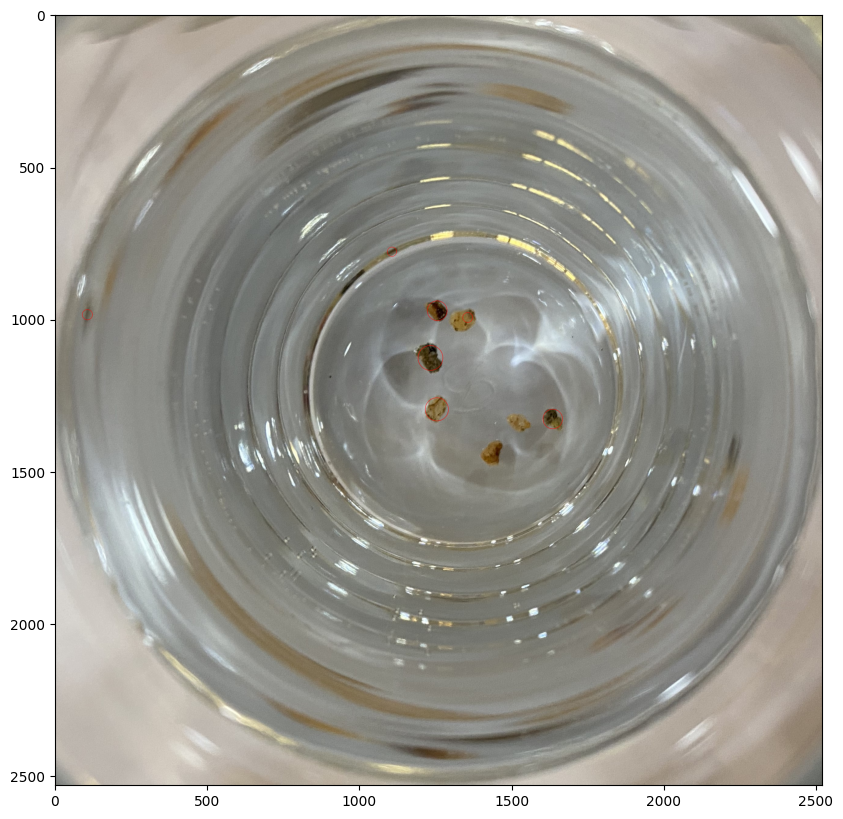

In [5]:
import matplotlib.pyplot as plt
import cv2

# import imutils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os.path


fileref = "01_IMG_7587.jpg"

original = cv2.imread(fileref)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 150

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.08  # 0.08
# Set edge gradient
params.thresholdStep = 0.5

# Filter by Area.
params.filterByArea = True
params.minArea = 300

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(original)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(
    original,
    keypoints,
    np.array([]),
    (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

particles_num = len(keypoints)
print(particles_num)

# speech
speak(particles_num)

# write image
cv2.imwrite(os.path.join("keypoints_" + fileref[:-4] + ".jpg"), im_with_keypoints)

# Show
display = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 10))
plt.imshow(display)